# Understanding SSPs
Purpose: To work out some of the details on the relationship between the Fourier transform and SSPs.

In [31]:
import numpy as np
from numpy.linalg import norm
from numpy import array, cos, sin, exp, sqrt, pi, dot, real, imag, conj
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# I don't use this function, but include it for completeness.
# def conjsym(u):
#     '''
#      v = conjsym(u)
#      Alters the phases in u so that they are conjugate symmetric.
#     '''
#     n = len(u)
#     n2 = n // 2
#     v = np.zeros_like(u)
#     v[:] = u[:]
#     v[-n2+1:] = -np.flip(u[1:n2])
#     v[0] = 0.
#     v[n2] = 0.
#     return v

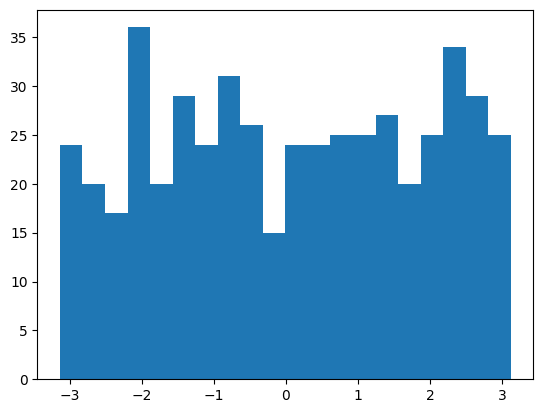

In [3]:
D = 500
u = np.random.random(size=(D,))*2*pi - pi
#u = conjsym(u)
plt.hist(u, bins=20);

In [4]:
def theta(u, x):
    '''
     Returns the FHRR representation of x using phases in u.
       theta(u, x) = exp(1j*u*x)
    '''
    U = exp(1j*u*x)
    return U

In [32]:
# I don't use this funciton, but include it for completeness.
# def phi(u, x):
#     '''
#      Returns the HRR representation of x using phases in u.
#        phi(u, x) = real( ifft( exp(1j*u*x) ) )
#     '''
#     U = exp(1j*u*x)
#     return real( ifft(U) )

In [6]:
def sim(x, y, u):
    '''
     Compute the inner-product similarity between
      theta(x, u) and theta(y, u)
    '''
    s = dot( theta(u, x), conj(theta(u, y)).T ) / len(u)
    return s

In [7]:
u = array([pi/3.])

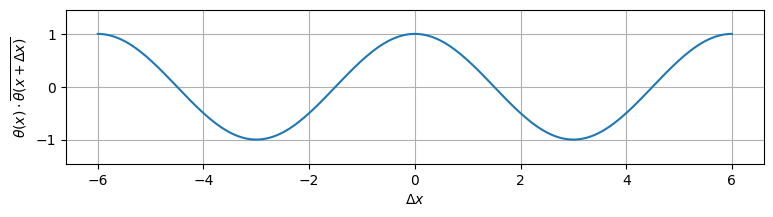

In [8]:
x = 3.45 # <-- this value could be anything
xx = np.linspace(-6, 6, 200)

sims = [sim(x, x+dx, u) for dx in xx]

plt.figure(figsize=(9,2))
plt.plot(xx, real(sims));
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\theta(x)\cdot \overline{ \theta(x+\Delta x)}$');
plt.axis('equal'); plt.grid('on');

In [9]:
u = array([pi/3, pi/2, pi/6])

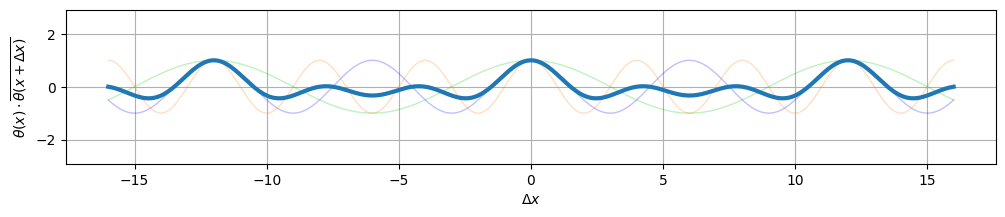

In [10]:
x = 3.45 # <-- this value could be anything
xx = np.linspace(-16, 16, 400)

sims = [sim(x, x+dx, u) for dx in xx]
sims1 = [sim(x, x+dx, u[1:]) for dx in xx]

plt.figure(figsize=(12,2))
cc = [(0, 0, 1, 0.25), (1, 0.5, 0, 0.25), (0, 0.8, 0, 0.25), (0.6, 0.6, 0, 0.25)]
for k,uu in enumerate(u):
    sims0 = [sim(x, x+dx, u[k:k+1]) for dx in xx]
    plt.plot(xx, real(array(sims0)), lw=1, color=cc[k])
plt.plot(xx, real(array(sims)), lw=3);
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\theta(x)\cdot \overline{ \theta(x+\Delta x)}$');
plt.axis('equal'); plt.grid('on');

In [11]:
D = 500
u = np.random.random(size=(D,))*2*pi - pi

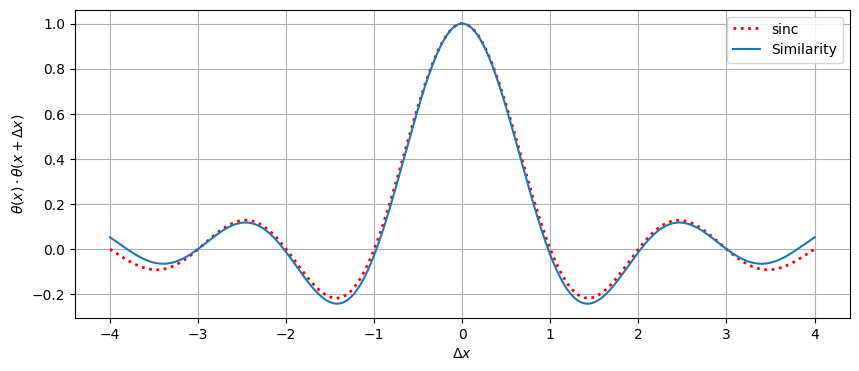

In [12]:
x = 1.
xx = np.linspace(-4, 4, 200)

sims = [sim(x, x+dx, u) for dx in xx]

plt.figure(figsize=(10,4))
plt.plot(xx, np.sinc(xx), 'r:', lw=2);
plt.plot(xx, real(sims));
plt.grid('on'); plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\theta(x)\cdot \theta(x+\Delta x)$');
plt.legend(['sinc', 'Similarity']);

# 2D

## Multi-dim version of $\theta$

In [13]:
def theta(A, x):
    '''
     Returns the FHRR representation of x using phases in A.
       theta(A, x) = exp(1j*A@x)
    
     Inputs:
      x  (k,) vector, or scalar
      A  (N,k) array, or (N,) if x is scalar
      
     Output:
      U  (N,) vector (unit-modulus complex)
    '''
    if type(x) in (np.ndarray, list):
        U = exp(1j*A@x)
    else:
        U = exp(1.j*A*x)
    return U

In [14]:
A = array([pi/2, pi]) #np.random.uniform(-pi, pi, size=(5,2))
x = array([1, 2.])

In [15]:
x = array([0,0.])
domain = (-6, 6, -6, 6)
xx = np.linspace(domain[0], domain[1], 200)
yy = np.linspace(domain[2], domain[3], 200)

sims = np.zeros( (len(xx), len(yy)) )
for c,dx in enumerate(xx):
    for r,dy in enumerate(yy):
        sims[r,-c] = real( sim(x+array([dx,dy]), x, A) )

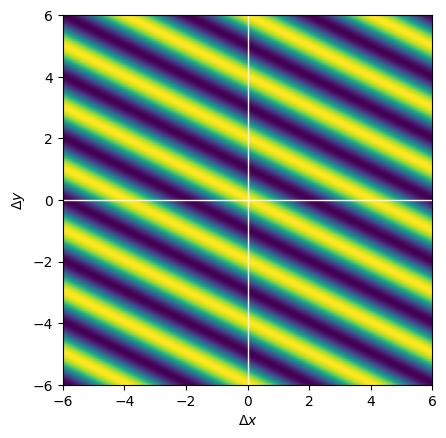

In [16]:
plt.imshow(sims, extent=domain);
plt.axhline(0, color='white', lw=1); plt.axvline(0, color='white', lw=1);
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\Delta y$');

## Hex-SSPs

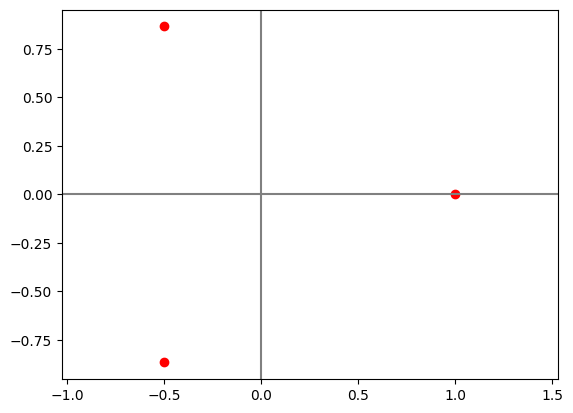

In [17]:
A = array([[1, 0],
           [-0.5, sqrt(3)/2],
           [-0.5, -sqrt(3)/2]])
plt.plot(A[:,0], A[:,1], 'ro');
plt.axhline(0, color='gray'); plt.axvline(0, color='gray'); plt.axis('equal');

In [18]:
x = array([0,0.])
rng = 12
domain = (-rng, rng, -rng, rng)
xx = np.linspace(domain[0], domain[1], 200)
yy = np.linspace(domain[2], domain[3], 200)

sims = np.zeros( (len(xx), len(yy)) )
for c,dx in enumerate(xx):
    for r,dy in enumerate(yy):
        sims[r,c] = real( sim(x, x+array([dx,dy]), A) )

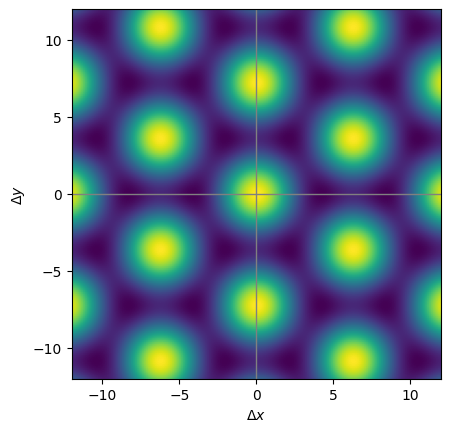

In [19]:
plt.imshow(sims, extent=domain);
plt.axhline(0, color='gray', lw=1); plt.axvline(0, color='gray', lw=1);
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\Delta y$');

## Random phases in 2D

In [20]:
A = np.random.uniform(-pi, pi, size=(1000, 2))

In [21]:
x = array([0,0.])
rng = 12
domain = (-rng, rng, -rng, rng)
xx = np.linspace(domain[0], domain[1], 200)
yy = np.linspace(domain[2], domain[3], 200)

sims = np.zeros( (len(xx), len(yy)) )
for c,dx in enumerate(xx):
    for r,dy in enumerate(yy):
        sims[r,c] = real( sim(x, x+array([dx,dy]), A) )

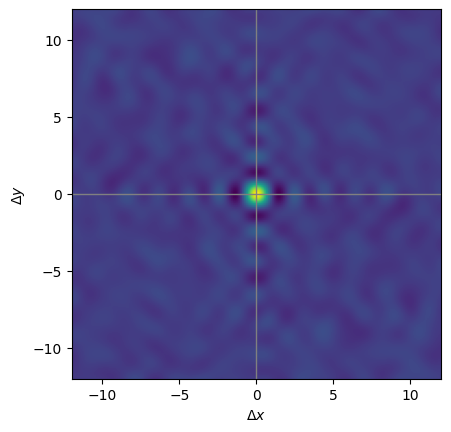

In [22]:
plt.imshow(sims, extent=domain);
plt.axhline(0, color='gray', lw=1); plt.axvline(0, color='gray', lw=1);
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\Delta y$');

## Grid Cells
Create random samples from $\mathcal{U} [-\pi, \pi]^2$ and see if there are simplexes whose interference pattern makes a grid cell.

In [23]:
A = np.random.uniform(-pi, pi, size=(400, 2))

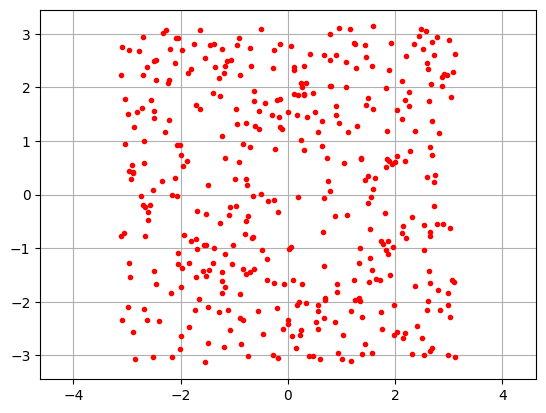

In [24]:
plt.plot(A[:,0], A[:,1], 'r.'); plt.axis('equal'); plt.grid('on');

In [25]:
# Create a 120 degree rotation matrix
ang = 2*pi/3
R = array([[cos(ang), sin(ang)], [-sin(ang), cos(ang)]])

A1 = A@R     # rotate samples 120 degrees
A2 = A@R.T   # rotate samples -120 degrees

simplexes = []
for n in range(4):
    
    min_simplex = []
    min_cost = 1.e100
    
    # Search for a simplex that makes an equilateral triangle centred
    # on the origin.

    # Loop over points
    for i,r1 in enumerate(A):
        skip = False
        for ss in simplexes:
            if i in ss:
                skip = True
        
        if not skip:
            
            # Nearest 120-degree-rotated point
            d1 = norm(A1-r1, axis=1)
            j = np.argmin(d1)

            # Nearest -120-degree-rotated point
            d2 = norm(A2-r1, axis=1)
            k = np.argmin(d2)

            # Do they add close to the zero vector?
            sum_vect = A[i] + A[j] + A[k]

            cost = norm(sum_vect)

            if cost<min_cost:
                min_simplex = [i, j, k]
                min_cost = cost
        
    simplexes.append(min_simplex)

In [26]:
simplex = array([A[k] for k in simplexes[1]])

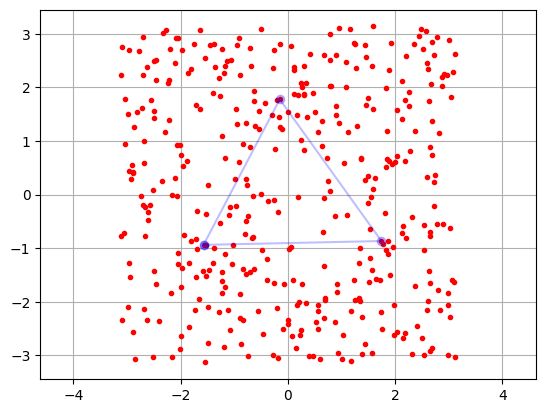

In [27]:
plt.plot(A[:,0], A[:,1], 'r.'); plt.axis('equal'); plt.grid('on');
blah = np.vstack((simplex, simplex[0]))
plt.plot(blah[:,0], blah[:,1], color=(0, 0, 1, 0.25), marker='o');

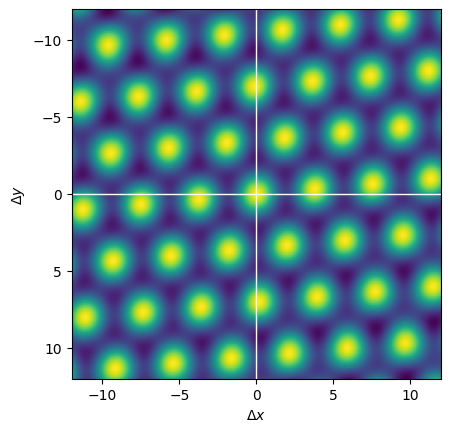

In [28]:
x = array([0,0.])
rng = 12
domain = (-rng, rng, -rng, rng)
xx = np.linspace(domain[0], domain[1], 200)
yy = np.linspace(domain[2], domain[3], 200)

sims = np.zeros( (len(xx), len(yy)) )
for c,dx in enumerate(xx):
    for r,dy in enumerate(yy):
        sims[r,c] = real( sim(x, x+array([dx,dy]), simplex) )

plt.imshow(sims, extent=domain); plt.gca().invert_yaxis();
plt.axhline(0, color='white', lw=1); plt.axvline(0, color='white', lw=1);
plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\Delta y$');

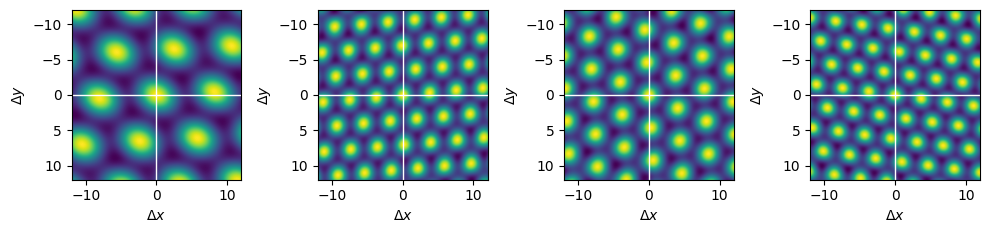

In [29]:
plt.figure(figsize=(10,3))
x = array([0,0.])
rng = 12
domain = (-rng, rng, -rng, rng)
xx = np.linspace(domain[0], domain[1], 200)
yy = np.linspace(domain[2], domain[3], 200)

for k,ss in enumerate(simplexes):
    simplex = A[ss,:]
    plt.subplot(1,4,k+1)
    sims = np.zeros( (len(xx), len(yy)) )
    for c,dx in enumerate(xx):
        for r,dy in enumerate(yy):
            sims[r,c] = real( sim(x, x+array([dx,dy]), simplex) )

    plt.imshow(sims, extent=domain); plt.gca().invert_yaxis();
    plt.axhline(0, color='white', lw=1); plt.axvline(0, color='white', lw=1);
    plt.xlabel(r'$\Delta x$'); plt.ylabel(r'$\Delta y$');
    
plt.tight_layout()

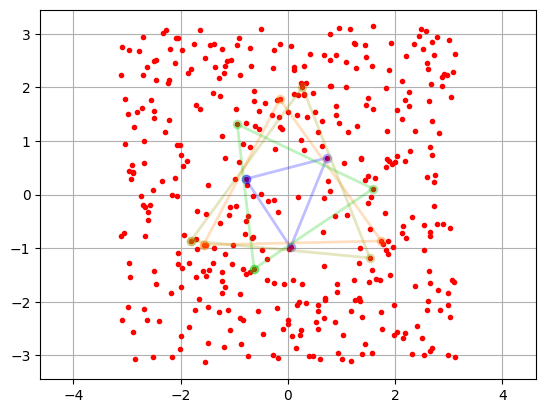

In [30]:
plt.plot(A[:,0], A[:,1], 'r.'); plt.axis('equal'); plt.grid('on');
cc = [(0, 0, 1, 0.25), (1, 0.5, 0, 0.25), (0, 0.8, 0, 0.25), (0.6, 0.6, 0, 0.25)]
for k,ss in enumerate(simplexes):
    simplex = A[ss,:]
    blah = np.vstack((simplex, simplex[0]))
    plt.plot(blah[:,0], blah[:,1], color=cc[k], marker='o', lw=2);